## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

## Load the data

In [2]:
data=pd.read_csv(r'DataSet/real_estate_price_size_year.csv')
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [3]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## Create multiple regression

## Define the dependent and the independent variables


In [12]:
y=data['price']
x1=data[['size','year']]

In [7]:
data.year.unique()

array([2015, 2009, 2018, 2006], dtype=int64)

## Explore the data

<AxesSubplot:>

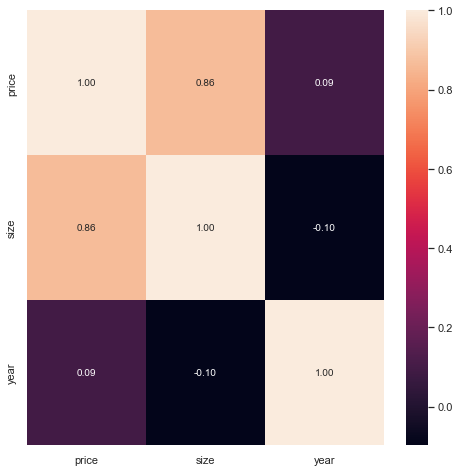

In [6]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(corr,vmax=1,cbar=True,annot=True,fmt='.2f',annot_kws={'size': 10})


<AxesSubplot:xlabel='size', ylabel='price'>

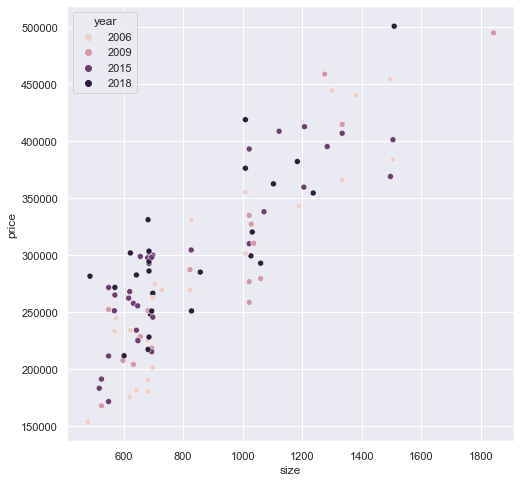

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="size", y="price", hue="year",ax=ax)

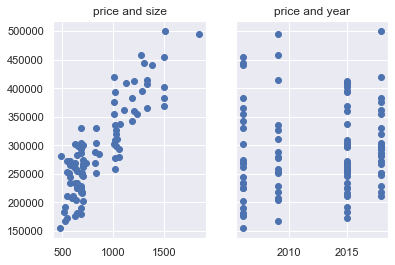

In [9]:
fig, (ax1,ax2)=plt.subplots(ncols=2,sharey=True)
ax1.scatter(data['size'],data['price'])
ax1.set_title('price and size')
ax2.scatter(data['year'],data['price'])
ax2.set_title('price and year')
plt.show()

## Regression itself

In [15]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.77e-32
Time:                        11:03:37   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""